## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [3]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [4]:
# your code here
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv', 
                 sep=',')
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [5]:
# Проверяем есть ли пропуски
print(data.isna().values.any())

False


In [6]:
cat_features_mask = (data.dtypes == "object").values

# количественные признаки
print(data.columns[~cat_features_mask])

Index(['duration', 'amount', 'age'], dtype='object')


In [7]:
# бинарные признаки (сredit_risk не признак, так как является целевой переменной)
binary = data.columns[data.nunique()==2]
for col in binary:
    print(f'{col:20} {data[col].unique()}')

people_liable        ['0 to 2' '3 or more']
telephone            ['no' 'yes (under customer name)']
foreign_worker       ['no' 'yes']
credit_risk          ['good' 'bad']


In [8]:
# Категориальные и порядковые признаки
data_obj = data.select_dtypes(include='object')
# print(data.apply(lambda col: col.unique()))
for col in data_obj:
    if col not in binary:
        col_name = col
        for category in data_obj[col].unique():
            print(f"{col_name:30} {category}")
            col_name = ''
        print()

status                         no checking account
                               ... < 0 DM
                               ... >= 200 DM / salary for at least 1 year
                               0<= ... < 200 DM

credit_history                 all credits at this bank paid back duly
                               no credits taken/all credits paid back duly
                               existing credits paid back duly till now
                               delay in paying off in the past
                               critical account/other credits elsewhere

purpose                        car (used)
                               others
                               retraining
                               furniture/equipment
                               car (new)
                               business
                               domestic appliances
                               radio/television
                               repairs
                               vacatio

In [9]:
# Разделим признаки на порядковые и категориальные
ordinal = ['employment_duration', 'installment_rate', 'present_residence', 'number_credits', 'job']
categorial = [col for col in data_obj.columns if col not in binary and col not in ordinal]

#### Выводы

##### Пропусков в данных нет.

#### Количественные признаки:
1. **duration**	
2. **amount**	
3. **age**

#### Бинарные признаки:
1. **people_liable** (можно отнести и к порядковым, при кодировании различий не будет)
2. **telephone**
3. **foreign_worker**

#### Порядковые признаки:
1. **employment_duration** (значения можно упорядочить от 'unemployed' до  '>= 7 yrs')
2. **installment_rate** (значения можно упорядочить от '< 20' до '>= 35')
3. **present_residence** (значения можно упорядочить от '< 1 yr' до  '>= 7 yrs')
4. **number_credits** (значения можно упорядочить от '1' до '>= 6')
5. **job** (значения можно упорядочить от 'unemployed/unskilled - non-resident' до 'manager/self-empl./highly qualif. employee', немного спорно, но в модели работает хорошо)

#### Категориальные признаки:
1. **status** (не включил в порядковые,так как есть значение "no checking account", которое нельзя сравнить с остальными)
2. **credit_history**
3. **purpose**
4. **savings** (не включил в порядковые,так как есть значение "unknown/no savings account", которое нельзя сравнить с остальными)
5. **personal_status_sex** 
6. **other_debtors**
7. **property**
8. **other_installment_plans**
9. **housing**


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [10]:
# your code here
print(data.groupby("purpose")["amount"].mean())

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64


### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [11]:
# your code here
data_under_30 = data[data["age"] < 30]
print(f'{100 * data_under_30[data_under_30.housing == "rent"].shape[0] / data_under_30.shape[0]} %')

data_above_40 = data[data["age"] > 40]
print(f'{100 * data_above_40[data_above_40.housing == "rent"].shape[0] / data_above_40.shape[0]} %')

66.66666666666667 %
68.01470588235294 %


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [12]:
# your code here
# print(data.number_credits.unique())
data[(data.foreign_worker == "yes") & ((data.number_credits == '4-5') | (data.number_credits == '>= 6'))].shape[0]

1

### Задание 6 (1 балл)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

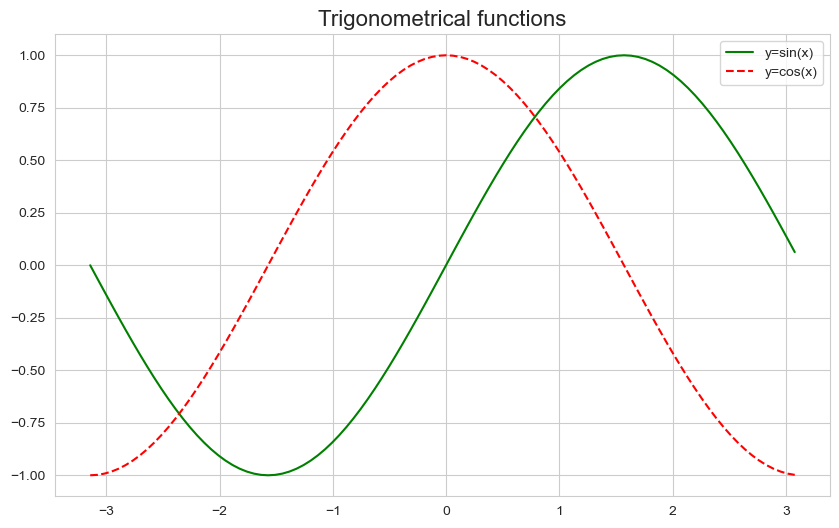

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(-np.pi, np.pi, 2*np.pi / 100)
plt.plot(x, np.sin(x), 'g-', label="y=sin(x)")
plt.plot(x, np.cos(x), 'r--', label="y=cos(x)")
plt.grid(visible=True)
plt.title("Trigonometrical functions", fontsize=16)
plt.legend()
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

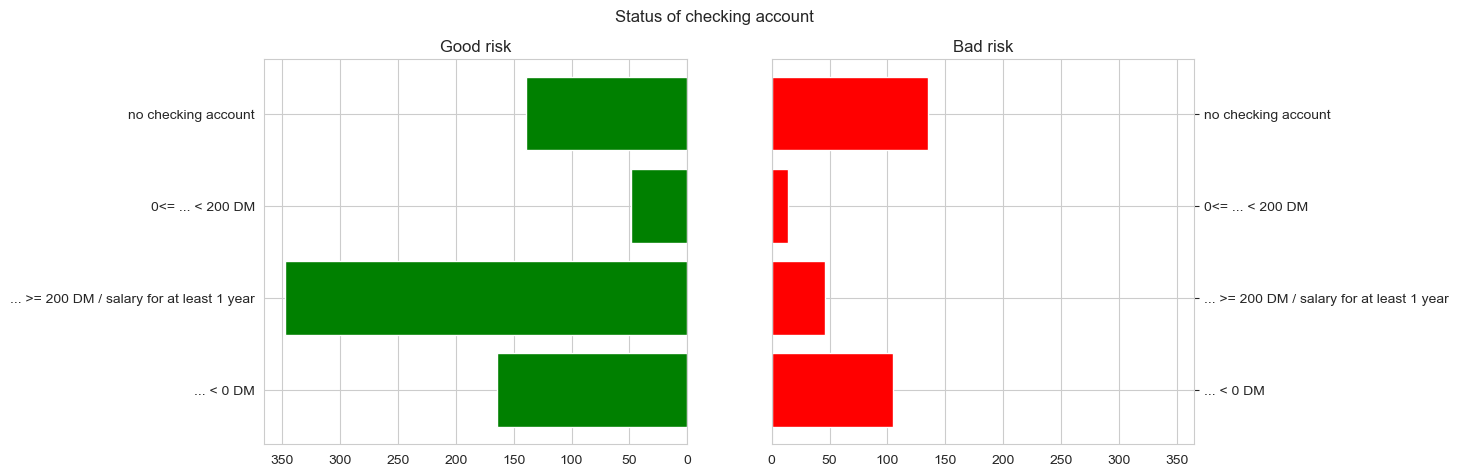

In [15]:
# Зададим размеры и стиль фигуры, количество графиков
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Строим график для положительных кейсов
axs[0].barh(sorted(data['status'].unique()), data[data.credit_risk == 'good'].sort_values('status').groupby('status').credit_risk.value_counts(), color='green');
# Строим график для отрицательных кейсов
axs[1].barh(sorted(data['status'].unique()), data[data.credit_risk == 'bad'].sort_values('status').groupby('status').credit_risk.value_counts(), color='red');

# Переносим направо вертикальную шкалу(подписи) вторго графика
axs[1].yaxis.tick_right()

# Устанавливаем одинаковый максимум для горизонтальных шкал двух графиков
max_xlim = max(axs[0].get_xlim(), axs[1].get_xlim())
axs[0].set_xlim(max_xlim)
axs[1].set_xlim(max_xlim)

# Заголовки графиков
axs[0].set_title('Good risk')
axs[1].set_title('Bad risk')
# Заголовок всей фигуры
fig.suptitle("Status of checking account")

# Переворачиваем(отражаем) первый график
plt.subplot(1, 2, 1)
plt.gca().invert_xaxis()
plt.show()

##### Выводы
1. При отсутствии текущего счета *(no checking account)* число положительных и отрицательных кейсов одинаковое (соотношение 1/1);
2. Отношение числа положительных кейсов к числу отрицательных растет с ростом размера текущего счета;
3. Таким образом, наибольшая вероятность погашения кредита в случае, когда размер текущего счета наибольший *(... >= 200 DM / salary for at least 1 year)* - соотношение положительных кейсов к отрицательным примерно 7/1;
4. При отрицательном размере текущего счета *(... < 0 DM)* - соотношение положительных кейсов к отрицательным примерно 2/1;
5. При небольшом размере текущего счёта *(0<= ... < 200 DM)* - соотношение положительных кейсов к отрицательным примерно 4/1;
4. Наименьшая вероятность успешного погашения кредита при выдаче кредита лицам, не имеющим текущего счета *(no checking account)* - соотношение положительных кейсов к отрицательным примерно 1/1.


In [16]:
print(data.groupby("savings")["amount"].count())

savings
... <  100 DM                 103
... >= 1000 DM                183
100 <= ... <  500 DM           63
500 <= ... < 1000 DM           48
unknown/no savings account    603
Name: amount, dtype: int64


### Задание 8  (0.5 балла)

In [18]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

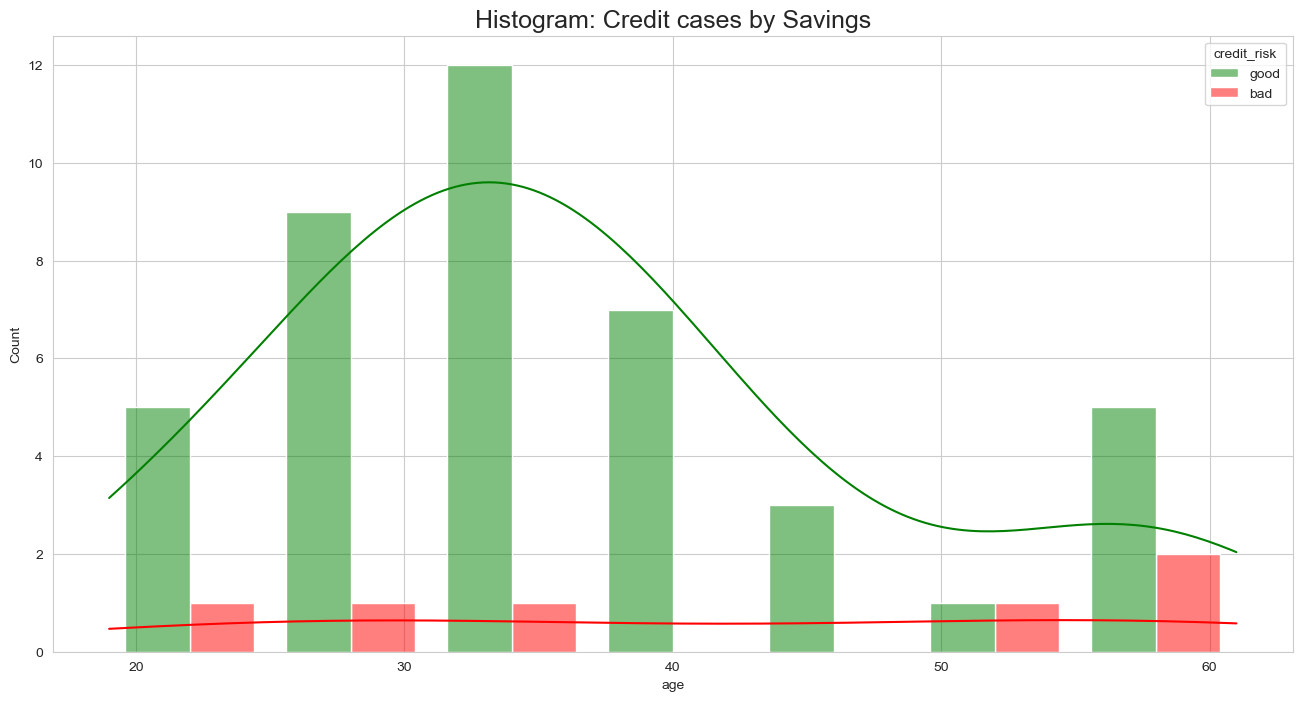

In [21]:
# Зададим размеры и стиль фигуры
fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Histogram: Credit cases by Savings', fontsize=18)
# Строим график
sns.histplot(data[data.savings == "500 <= ... < 1000 DM"], x='age', hue='credit_risk', multiple="dodge",
             shrink = 0.8, ax=ax, palette=['green', 'red'], kde=True);

##### Выводы
1. Сбережения большиства людей неизвестны или отсутствуют *(unknown/no savings account)*, также большой процент сбережений заемщиков превышает 1000 DM;
2. При отсутствии сберегательного счета - соотношение положительных кейсов к отрицательным примерно 7/4;
3. Отношение числа положительных кейсов к числу отрицательных растет с ростом размера сберегательного счета;
4. При размере счета *<  100 DM* - соотношение положительных кейсов к отрицательным примерно 2/1;
5. При размере счета *100 <= ... <  500 DM* - соотношение положительных кейсов к отрицательным примерно 4/1;
6. При размере счета *500 <= ... <  1000 DM* - соотношение положительных кейсов к отрицательным примерно 5/1;
7. При размере счета *... >= 1000 DM* - соотношение положительных кейсов к отрицательным примерно 5/1;    

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

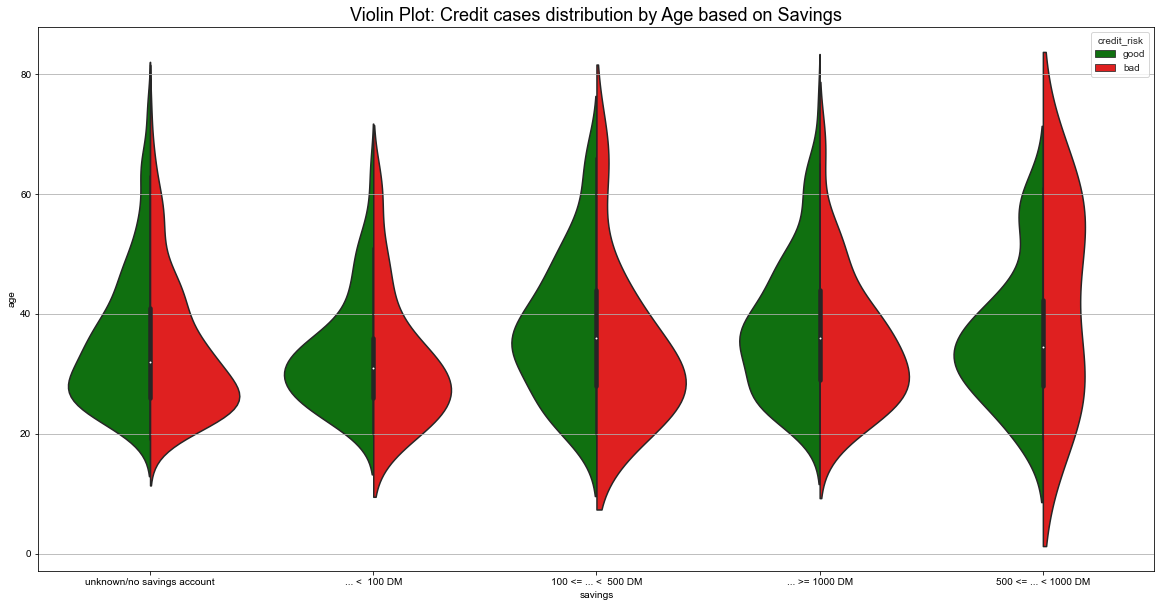

In [16]:
# Зададим размеры и стиль фигуры
fig, ax = plt.subplots(figsize=(20, 10))
plt.title('Violin Plot: Credit cases distribution by Age based on Savings', fontsize=18)
sns.set_style(style="white")
plt.grid(visible=True)

# Строим график
sns.violinplot(data=data, x='savings', y='age', hue='credit_risk',
               split=True, palette=['green', 'red'], ax=ax);

##### Выводы
1. **Медианные возрасты заемщиков для каждого размера сберегательного счёта:** 
* unknown/no savings account - примерно 32 года;
* ... <  100 DM - примерно 32 года;
* 100 <= ... <  500 DM - примерно 36 лет;
* 500 <= ... < 1000 DM - примерно 36 лет;
* ... >= 1000 DM - примерно 34 года;
2. При отсутствии данных о сберегательном счете *unknown/no savings account* плотности распределения по возрасту положительных и отрицательных кейсов очень схожи, однако среднее значение возраста для плохих случаев меньше на 1-2 года, разброс возрастов примерно одинаковый;
3. При размере сберегательного счета *... <  100 DM* среднее значение возраста для плохих случаев примерно 27, для хороших - 32, разброс возрастов положительных кейсов меньше, чем отрицательных. Возраст заемщиков в этой категории не превышает 70 лет;
4. При размере сберегательного счета *100 <= ... <  500 DM* среднее значение возраста для плохих случаев примерно 27, для хороших - 38, разброс возрастов положительных кейсов больше, чем для отрицательных. 
5. При размере сберегательного счета *500 <= ... < 1000 DM* плохие случаи распределены по возрастам более равномерно, чем хорошие, большинство положительных кейсов сконцентрированы в промежутке  от 20 до 45 лет. При возрасте заемщиков более 70 - гарантированный отрицательный кейс. Молодые заемщики из этой категории с большой вероятностью выплатят кредит, а лица старше 50 - наоборот;
6. При размере сберегательного счета *... >= 1000 DM* среднее значение возраста для плохих случаев примерно 27, для хороших - 38, разброс возрастов практически одинаковый, вероятность отрицательного кейса при возрасте больше 55 минимальная. 


### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

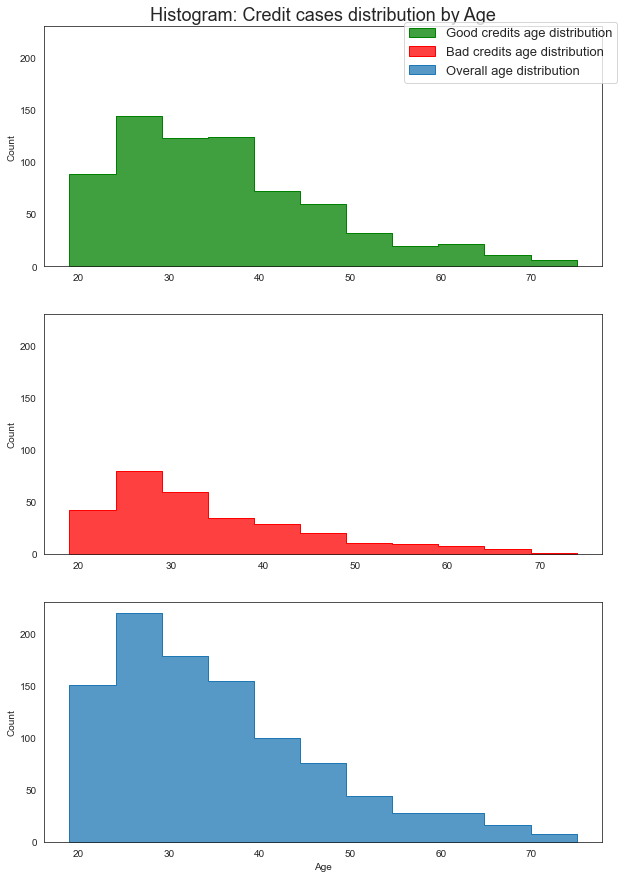

In [17]:
# Зададим размеры и стиль фигуры, количество графиков
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
axs[0].set_title('Histogram: Credit cases distribution by Age', fontsize=18)
sns.set_style(style="ticks")

# Строим первый график
plt.subplot(3, 1, 1)
sns.histplot(data=data[data.credit_risk=='good'], x='age', color='green', bins=11, element='step', label='Good credits age distribution')
plt.xlabel('')

# Строим второй график
plt.subplot(3, 1, 2)
sns.histplot(data=data[data.credit_risk=='bad'], x='age', color='red', bins=11, element='step', label='Bad credits age distribution')
plt.xlabel('')

# Строим третий график
plt.subplot(3, 1, 3)
sns.histplot(data=data, x='age', bins=11, element='step', label='Overall age distribution')
plt.xlabel('Age')

# Установим одинаковые пределы вертикальных осей на трех графиках
max_xlim = max(axs[0].get_ylim(), axs[1].get_ylim(), axs[2].get_ylim())
axs[0].set_ylim(max_xlim)
axs[1].set_ylim(max_xlim)
axs[2].set_ylim(max_xlim)

# Добавим легенду
fig.legend(bbox_to_anchor=(0.93, 0.89), fontsize=13)

plt.show()

##### Выводы
1. Больше всего кредитов берут люди в возрасте от 25 до 40, среди них наиболее надежными заемщиками являются от 35 до 40;
2. С увеличением возраста заемщиков отношение положительных кейсов к отрицательным растет;

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

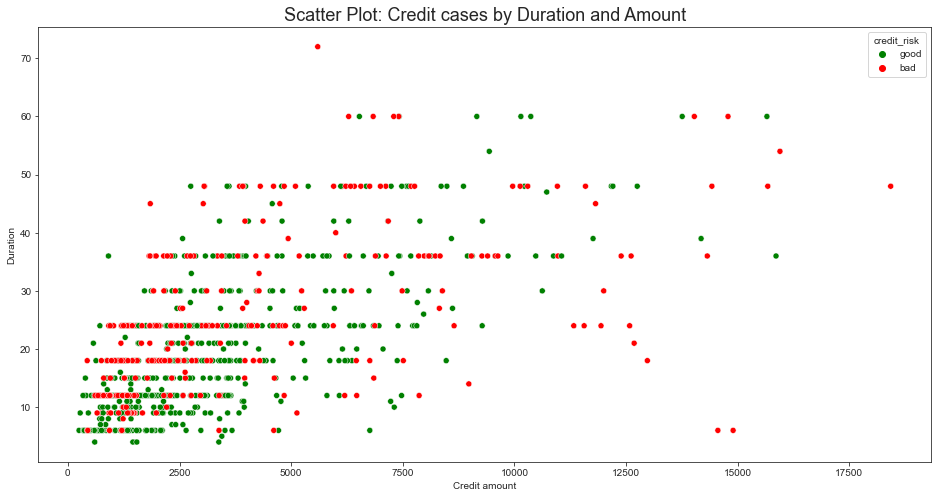

In [18]:
# Зададим размеры и стиль фигуры
fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Scatter Plot: Credit cases by Duration and Amount', fontsize=18)
ax.grid(False)
sns.set_style(style="ticks")

# Зададим подписи осей
ax.set_xlabel( "Credit amount")
ax.set_ylabel( "Duration")

# Построим диаграмму рассеяния для положительных и отрицательных кейсов
sns.scatterplot(data=data, x="amount", y="duration", hue="credit_risk", palette=['green', 'red']);

##### Выводы
1. Преобладающая часть кредитов - это кредиты на сумму менее 5000 на срок от 5 до 25;
2. Число отрицательных кейсов значительно превышает число положительных кейсов при большой сумме кредита и коротком сроке;
3. Чем больше срок, тем больше вероятность отрицательного кейса (плотность красных точек в верхней части графика больше);
4. Чем больше размер кредита, тем больше вероятность отрицательного кейса (плотность красных точек в правой части графика  больше);

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

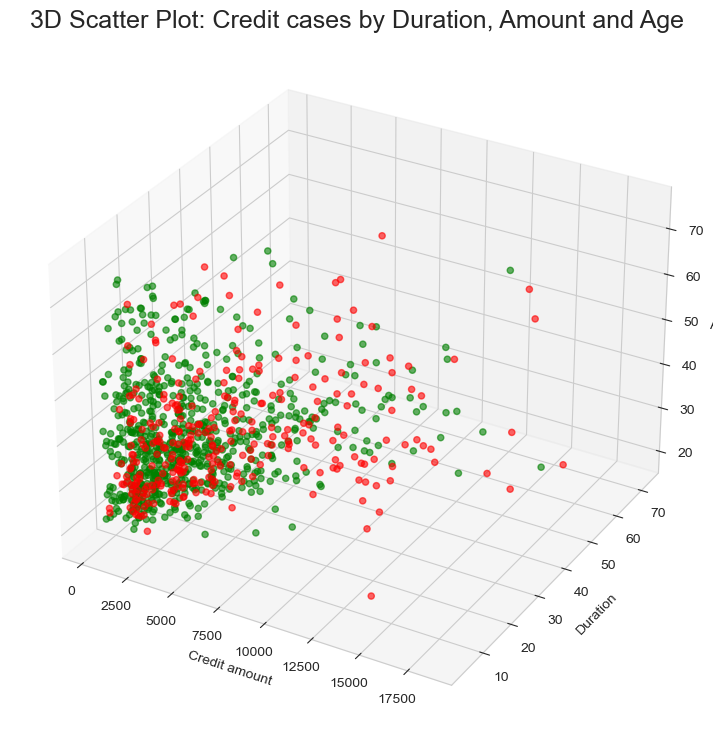

In [27]:
# Зададим размеры фигуры и трехмерное пространство
fig = plt.figure(figsize=(9, 9))
ax = plt.axes(projection='3d')
plt.title('3D Scatter Plot: Credit cases by Duration, Amount and Age', fontsize=18)

# Зададим подписи осей
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

# Построим диаграммы рассеяния для положительных и отрицательных кейсов
color_by_val = {"bad": 'red', "good": 'green'}
for value, color in color_by_val.items():
    data_val = data[data['credit_risk']==value]
    x = data_val["amount"]
    y = data_val["duration"]
    z = data_val["age"]

    ax.scatter(x, y, z, c=[color], alpha=0.6);

#### Выводы
1. Большую часть кредитов берут люди в возрасте от 20 до 50 лет на сумму до 7500;
2. Более взрослые люди реже берут кредиты, при этом они чаще выполняют кредитные обязательства по кредитам на сумму до 5000;
3. Лица старше 50 лет почти никогда не берут кредиты на суммы больше 7500;
4. Лица младше 30 лет в подавляющем большинстве не выполняют кредитные обязательства при сумме долга больше 7500;
5. Люди в возрасте от 30 до 45  наиболее успешно выплачивают кредиты размером до 12500;
6. Кредиты больше 12500 берут редко, в основном лица до  30 лет или старше 55, подавляющее большинство кредитов на суммы более 12500 - отрицательные кейсы;
7. Чем больше возраст займщиков, тем меньше средний срок кредита и тем больше отношение положительных кейсов к отрицательным;

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [28]:
# Выведем уникальные значения бинарных признаков и целевой переменной credit_risk
for xi in binary:
    print(f"'{xi}': {data[xi].unique()},")

'people_liable': ['0 to 2' '3 or more'],
'telephone': ['no' 'yes (under customer name)'],
'foreign_worker': ['no' 'yes'],
'credit_risk': ['good' 'bad'],


In [29]:
# Задаем правильный порядок для признаков и целевой переменной
binary_cat_by_col = {'people_liable': ['0 to 2', '3 or more'],
                     'telephone': ['no', 'yes (under customer name)'],
                     'foreign_worker': ['no', 'yes'],
                     'credit_risk': ['bad', 'good']}

# Закодируем значения бинарных признаков и целевой переменной нулями и единицами
for column, categories in binary_cat_by_col.items():
    data[column] = np.where(data[column] == categories[0], 0, 1)

In [30]:
# Выведем уникальные значения порядковых признаков
for xi in ordinal:
    print(f"'{xi}': {data[xi].unique()},")

'employment_duration': ['< 1 yr' '1 <= ... < 4 yrs' '4 <= ... < 7 yrs' 'unemployed' '>= 7 yrs'],
'installment_rate': ['< 20' '25 <= ... < 35' '20 <= ... < 25' '>= 35'],
'present_residence': ['>= 7 yrs' '1 <= ... < 4 yrs' '4 <= ... < 7 yrs' '< 1 yr'],
'number_credits': ['1' '2-3' '4-5' '>= 6'],
'job': ['skilled employee/official' 'unskilled - resident'
 'unemployed/unskilled - non-resident'
 'manager/self-empl./highly qualif. employee'],


In [31]:
# Задаем правильный порядок для признаков
ordinal_cat_by_col = {'employment_duration': ['unemployed', '< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs'],
                             'installment_rate': ['< 20', '20 <= ... < 25', '25 <= ... < 35', '>= 35'],
                             'present_residence': ['< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs'],
                             'number_credits': ['1', '2-3', '4-5', '>= 6'],
                             'job': ['unemployed/unskilled - non-resident', 'unskilled - resident', 
                                     'skilled employee/official', 'manager/self-empl./highly qualif. employee']}

# Заменим уникальные значения порядковых признаков их порядковыми номерами
for column, categories in ordinal_cat_by_col.items():
    data[column].replace(categories, list(range(len(categories))), inplace=True)

In [32]:
# Удалим все категориальные признаки, кроме проанализированных
categorial.remove('status')
categorial.remove('savings')
data_no_cat = data.drop(categorial, axis=1)

# Оставшиеся признаки закодируем с помощью one-hot кодирования
features = data_no_cat.drop('credit_risk', axis=1)
target = data_no_cat['credit_risk']
data_1hot = pd.get_dummies(features, drop_first=True)
data_no_cat = pd.concat([data_1hot, target], axis=1)


In [33]:
data = data_no_cat
data.columns

Index(['duration', 'amount', 'employment_duration', 'installment_rate',
       'present_residence', 'age', 'number_credits', 'job', 'people_liable',
       'telephone', 'foreign_worker',
       'status_... >= 200 DM / salary for at least 1 year',
       'status_0<= ... < 200 DM', 'status_no checking account',
       'savings_... >= 1000 DM', 'savings_100 <= ... <  500 DM',
       'savings_500 <= ... < 1000 DM', 'savings_unknown/no savings account',
       'credit_risk'],
      dtype='object')

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [34]:
data.corr()

,duration,amount,employment_duration,installment_rate,present_residence,age,number_credits,job,people_liable,telephone,foreign_worker,status_... >= 200 DM / salary for at least 1 year,status_0<= ... < 200 DM,status_no checking account,savings_... >= 1000 DM,savings_100 <= ... < 500 DM,savings_500 <= ... < 1000 DM,savings_unknown/no savings account,credit_risk
duration,1.000000,0.624988,0.057381,-0.074749,0.034067,-0.037550,-0.011284,0.210910,-0.023834,0.164718,-0.134680,-0.063467,-0.076455,0.022244,0.071185,-0.040257,-0.048261,-0.047228,-0.214927
amount,0.624988,1.000000,-0.008376,0.271322,0.028917,0.032273,0.020785,0.285393,0.017144,0.277000,-0.030662,-0.039480,-0.100500,-0.020924,0.106548,-0.064257,-0.055541,-0.036445,-0.154740
employment_duration,0.057381,-0.008376,1.000000,-0.126161,0.245081,0.259116,0.125791,0.101225,0.097192,0.060518,-0.022845,0.121506,-0.000654,-0.033818,0.091499,0.047058,0.044808,-0.110936,0.116002
installment_rate,-0.074749,0.271322,-0.126161,1.000000,-0.049302,-0.057271,-0.021669,-0.097755,0.071207,-0.014413,0.094762,-0.024961,0.041591,-0.046917,-0.018367,0.023186,-0.034708,0.008626,0.072404
present_residence,0.034067,0.028917,0.245081,-0.049302,1.000000,0.265626,0.089625,0.012655,0.042643,0.095359,-0.039691,0.001985,-0.064303,0.088350,0.080564,0.032702,-0.002375,-0.089921,-0.002967
age,-0.037550,0.032273,0.259116,-0.057271,0.265626,1.000000,0.150718,0.015383,0.118589,0.143506,0.013981,0.061042,0.037671,-0.010968,0.077450,0.034769,0.028028,-0.043918,0.091272
number_credits,-0.011284,0.020785,0.125791,-0.021669,0.089625,0.150718,1.000000,-0.026321,0.109667,0.065553,-0.018893,0.094435,-0.040213,-0.029195,-0.015593,-0.061599,0.036169,0.033909,0.045732
job,0.210910,0.285393,0.101225,-0.097755,0.012655,0.015383,-0.026321,1.000000,-0.093559,0.383022,-0.092835,0.052704,-0.050099,-0.026413,0.029960,-0.037499,-0.017128,-0.000350,-0.032735
people_liable,-0.023834,0.017144,0.097192,0.071207,0.042643,0.118589,0.109667,-0.093559,1.000000,-0.014753,0.077071,0.010914,-0.008700,0.059041,0.033122,-0.008700,-0.005687,-0.019568,0.003015
telephone,0.164718,0.277000,0.060518,-0.014413,0.095359,0.143506,0.065553,0.383022,-0.014753,1.000000,-0.075012,0.061825,-0.028955,-0.067149,0.089956,0.004596,0.005796,-0.060861,0.036466


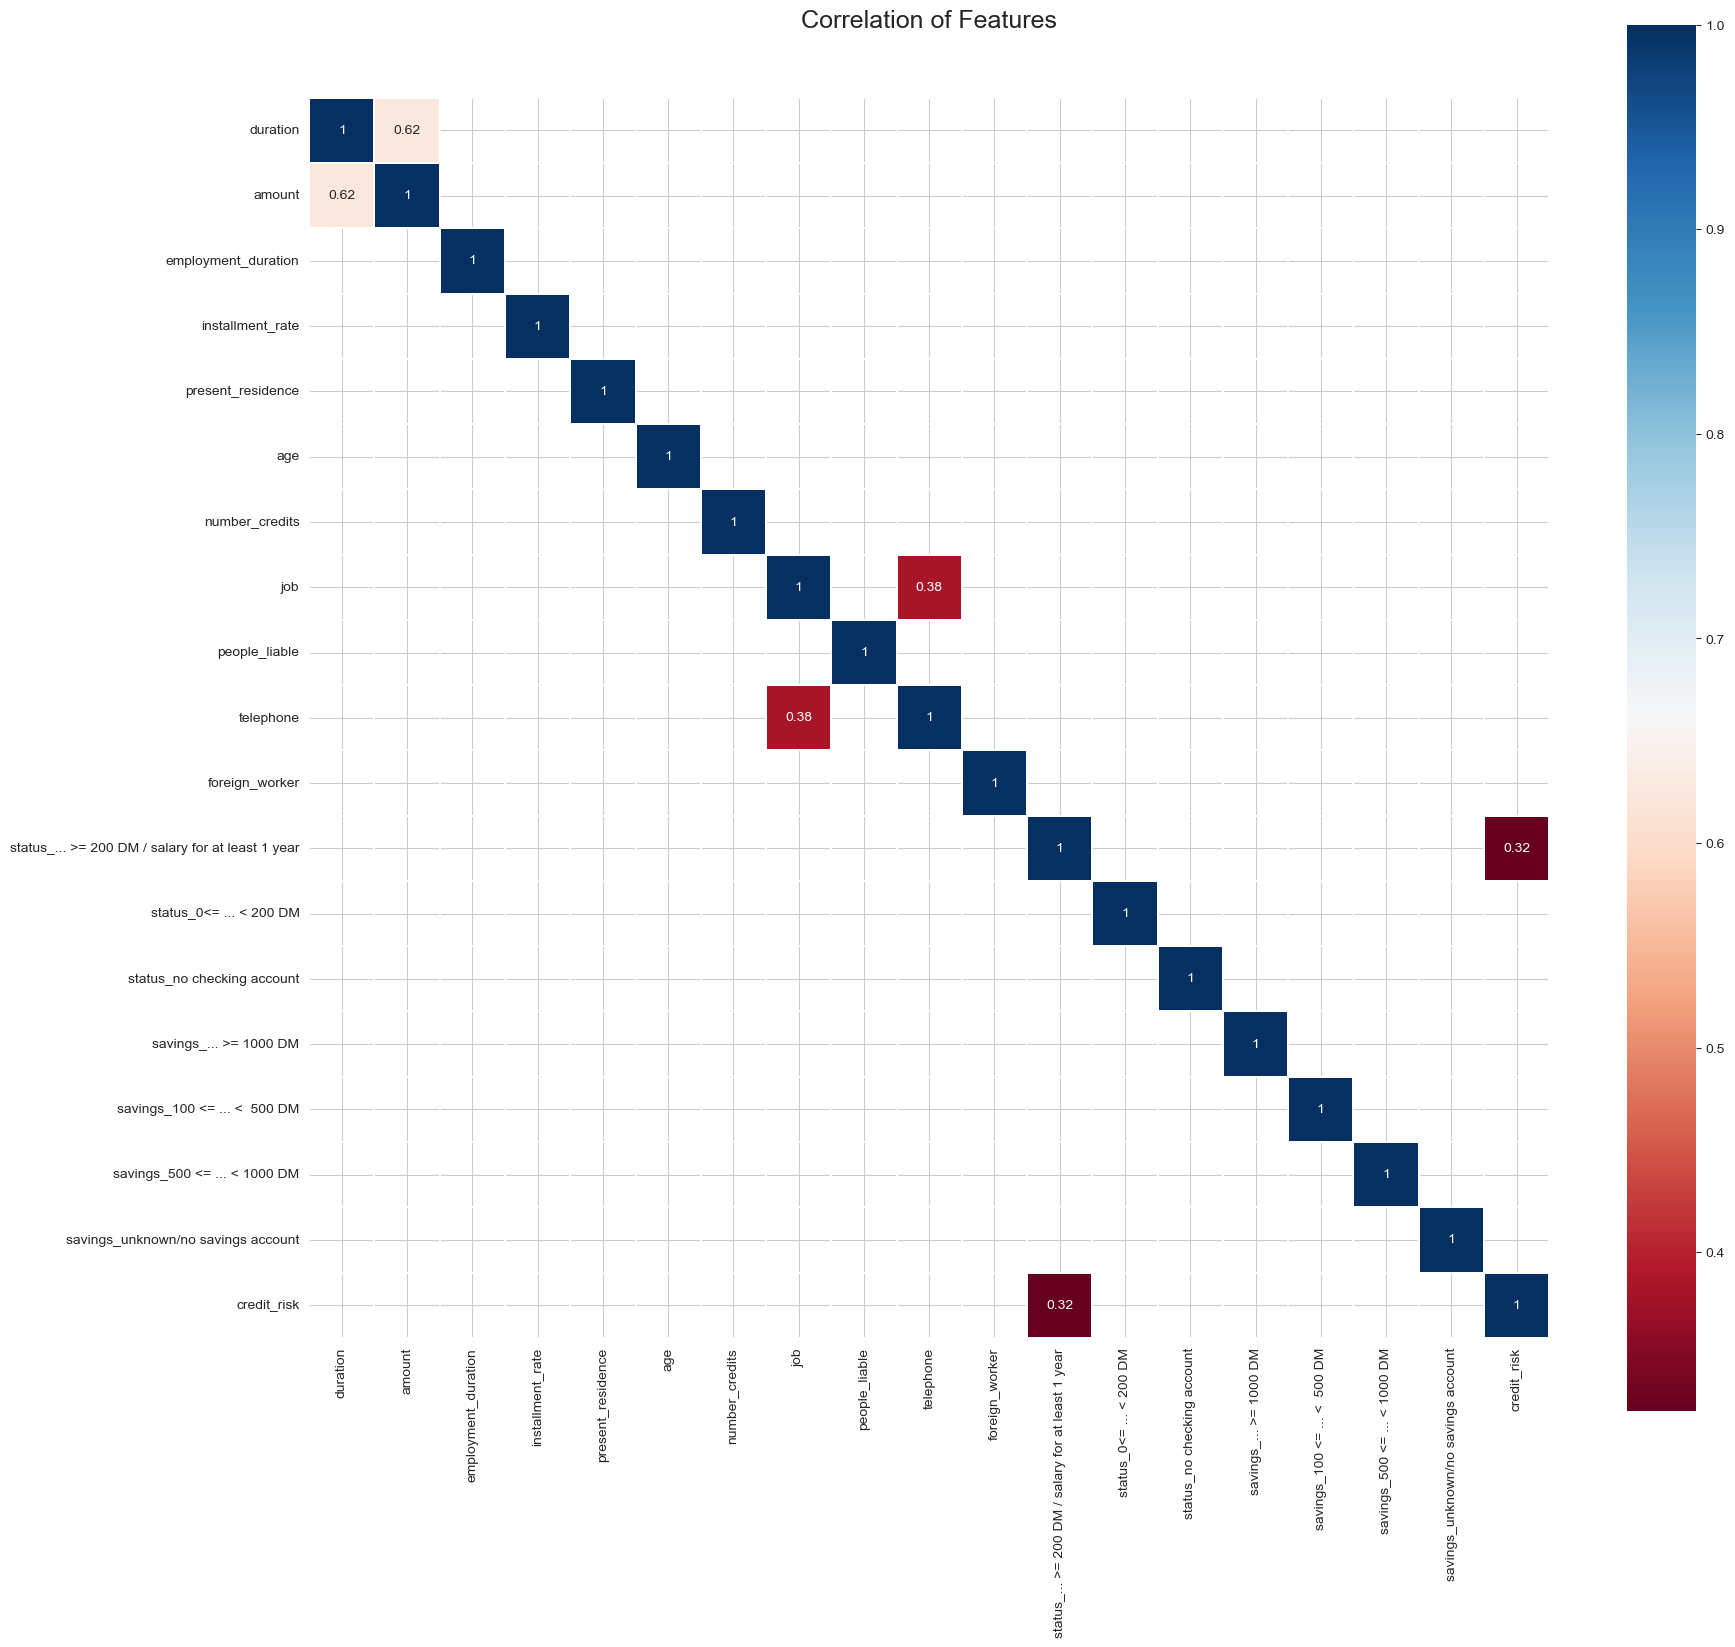

In [36]:
# Для того, чтобы лучше понимать связь признаков с целевой переменной, построим карту корреляции
colormap = plt.cm.RdBu
plt.figure(figsize=(20,18))

plt.title('Correlation of Features', y=1.05, size=18)
corr =  data.corr()
sns.heatmap(data.corr(),
            linewidths=0.1, vmax=1.0, mask=corr<0.3,
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
# "всегда говори да"-модель, которая позволяет достичь точности 0.7134 на train, 0.66 на test
def predict_easy(Xtest: np.array) -> np.array:
     return np.array([1,]*Xtest.shape[0])

# модель с вручную подобранными весами, которая позволяет достичь точности 0.71734 на train, 0.72 на test
def predict(Xtest: np.array) -> np.array:
    # your code here  
    
    # веса, подобранные согласно построенным графикам, карте корреляции и эмпирическим наблюдениям
    # большинство весов - коэффициенты корреляции
    # (признаки, корреляция целевой переменной с которыми больше, в среднем имеют больший вес)
    
    weights = {'duration': -0.21, 
               'amount': -0.13, 
               'employment_duration': 0.1, 
               'installment_rate': 0.072,
               'present_residence': -0.003 , 
               'age': 0.09, 
               'number_credits': -0.005, 
               'job': 0.033, 
               'people_liable': 0.003,
               'telephone': 0.036, 
               'foreign_worker': 0.082,
               'status_... >= 200 DM / salary for at least 1 year': 0.32,
               'status_0<= ... < 200 DM': 0.044, 
               'status_no checking account': -0.26,
               'savings_... >= 1000 DM': 0.13,
               'savings_100 <= ... <  500 DM': 0.071,
               'savings_500 <= ... < 1000 DM': 0.086,
               'savings_unknown/no savings account': -0.16}
    w = np.array(list(weights.values()))
    
    # Умножаем входную матрицу на вектор весов, чтобы получить вектор результата
    res = w0 + np.matmul(Xtest, w)
    
    # если res >= 0  =>  credit_risk = 1 ('good'), если res < 0  =>  credit_risk = 0 ('bad')
    return np.where(res<0, 0, 1)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', axis=1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

# Используйте X_train и y_train на ваше усмотрение

# Масштабируем матрицы признаков, чтобы было удобнее подбирать веса в функции predict
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = pd.DataFrame(data=sc.transform(X_train), columns=data.drop('credit_risk', axis=1).columns).values
X_test_scaled = pd.DataFrame(data=sc.transform(X_test), columns=data.drop('credit_risk', axis=1).columns).values

# За w0 возьмем отношение числа положительных кейсов в Xtrain к общему количеству кейсов в Xtrain
# Вычитаем 0.5 (из-за особенностей предсказания, чтобы сдвинуть к 0)
w0 = y_train[y_train == 1].shape[0] / y_train.shape[0] - 0.5

# print(accuracy_score(y_train, predict(X_train_scaled)))
print(accuracy_score(y_test, predict(X_test_scaled)))

0.72


In [1]:
import logging
import mediapipe as mp
import cv2
import numpy as np

MP_DRAWING = mp.solutions.drawing_utils
MP_DRAWING_STYLES = mp.solutions.drawing_styles
MP_FACE_MESH = mp.solutions.face_mesh

WHITE = (255, 255, 255)

In [19]:
class ImageCutter:
    """
    Class for image preprocessing.
    This class cuts image to leave only the face zone, sets black background and cuts out face to leave only hairline.
    """
    WIDTH_DELTA = 0.4
    FOREHEAD_DELTA = 0.7
    CHIN_DELTA = 0.3
    MIN_CONFIDENCE = 0.5
    SIZE = 500
    SIZE_CUT = 180

    def __init__(self):
        mp_face_detection = mp.solutions.face_detection
        self.__face_detection = mp_face_detection.FaceDetection(model_selection=1,
                                                                min_detection_confidence=self.MIN_CONFIDENCE)
        mp_selfie_segmentation = mp.solutions.selfie_segmentation
        self.__selfie_segmentation = mp_selfie_segmentation.SelfieSegmentation(model_selection=1)
        self.__drawing_spec = MP_DRAWING.DrawingSpec(thickness=1, circle_radius=1)

    def get_face_zone(self, image):
        """
        Method, which cuts image to leave only the zone with a face detection
        :param image: input image
        :return: cut image of the face
        """
        height, width = image.shape[:2]
        # Convert the BGR image to RGB
        results = self.__face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        # Check if any faces were detected
        if not results.detections:
            logging.debug('No face found')
            raise ValueError('No face')

        bbox_points = { "xmin": 0, "ymin": 0, "xmax": 0, "ymax": 0}
        # Get Bounding Box coordinates of
        for detection in results.detections:
            bbox = detection.location_data.relative_bounding_box
            bbox_points = {
                "xmin": max(int(bbox.xmin * width - bbox.width * width * self.WIDTH_DELTA), 0),
                "ymin": max(int(bbox.ymin * height - bbox.height * height * self.FOREHEAD_DELTA), 0),
                "xmax": min(int(bbox.width * width * (1 + self.WIDTH_DELTA) + bbox.xmin * width), width - 1),
                "ymax": min(int(bbox.height * height * (1 + self.CHIN_DELTA) + bbox.ymin * height), height - 1)
            }
        logging.debug('Face found. Image cut')
        return image[bbox_points["ymin"]:bbox_points["ymax"], bbox_points["xmin"]:bbox_points["xmax"]]

    def set_black_background(self, image):
        """
        Method, which sets black background using selfie segmentation
        :param image: input image
        :return: image with black background
        """
        height, width, channel = image.shape
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        logging.debug('Selfie segmentation.')
        # Get result of selfie segmentation
        results = self.__selfie_segmentation.process(image_rgb)
        # Extract segmented mask
        mask = results.segmentation_mask
        # The  mask returns true or false where the condition applies in the mask
        condition = np.stack((mask,) * 3, axis=-1) > self.MIN_CONFIDENCE
        # Create black background image of the same size as the original frame
        black = np.zeros((height, width, 3), dtype="uint8")
        logging.debug('Background is set to black.')
        # Combine frame and black background image using the condition
        return np.where(condition, image, black)

    def get_face(self, image):
        """
        Method, which resizes image, cuts it and sets background to black to leave only the face in the picture
        :param image: input image
        :return: face image with black background
        """
        # Resize the input image to reduce the time of cutting


        logging.debug('Cutting face zone')
        image_cut = self.get_face_zone(image)

        # Resize the image again to be of the same size as the images in the dataset
        #         new_size = (self.SIZE_CUT, int(image_cut.shape[0] * self.SIZE_CUT / image_cut.shape[1]))
        #         image_cut_resized = cv2.resize(image_cut, new_size)

        new_size = (self.SIZE, int(image_cut.shape[0] * self.SIZE / image_cut.shape[1]))
        image_cut_resized = cv2.resize(image_cut, new_size)
        logging.debug('Setting black background')
        face = self.set_black_background(image_cut_resized)

        return face

    def cut_face_out(self, image):
        """
        Method, which cuts out the face by contour using face mesh
        :param image: input image
        :return: image without face
        """
        print('Cutting out face...')
        with MP_FACE_MESH.FaceMesh(
                static_image_mode=True,
                max_num_faces=1,
                refine_landmarks=True,
                min_detection_confidence=self.MIN_CONFIDENCE) as face_mesh:

            # Convert the BGR image to RGB and process it with face landmark function
            results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            # Create a black image of the size of the input image to draw face landmarks on it
            black = np.zeros(image.shape, dtype="uint8")
            new_mask = black.copy()
            # Draw face mesh landmarks with thick lines on the image.
            if not results.multi_face_landmarks:
                return
            for face_landmarks in results.multi_face_landmarks:
                MP_DRAWING.draw_landmarks(
                    image=new_mask,
                    landmark_list=face_landmarks,
                    connections=MP_FACE_MESH.FACEMESH_TESSELATION,
                    landmark_drawing_spec=MP_DRAWING.DrawingSpec(
                        color=WHITE,
                        thickness=1,
                        circle_radius=0
                    ),
                    connection_drawing_spec=MP_DRAWING.DrawingSpec(
                        color=WHITE,
                        thickness=22,
                        circle_radius=0
                    ))
                MP_DRAWING.draw_landmarks(
                    image=new_mask,
                    landmark_list=face_landmarks,
                    connections=MP_FACE_MESH.FACEMESH_CONTOURS,
                    landmark_drawing_spec=MP_DRAWING.DrawingSpec(
                        color=WHITE,
                        thickness=1,
                        circle_radius=0
                    ),
                    connection_drawing_spec=MP_DRAWING.DrawingSpec(
                        color=WHITE,
                        thickness=1,
                        circle_radius=0
                    ))
                MP_DRAWING.draw_landmarks(
                    image=new_mask,
                    landmark_list=face_landmarks,
                    connections=MP_FACE_MESH.FACEMESH_IRISES,
                    landmark_drawing_spec=MP_DRAWING.DrawingSpec(
                        color=WHITE,
                        thickness=6,
                        circle_radius=0
                    ),
                    connection_drawing_spec=MP_DRAWING.DrawingSpec(
                        color=WHITE,
                        thickness=16,
                        circle_radius=0
                    ))
            # Use black image with painted up face zone as a mask
            new_mask = cv2.cvtColor(new_mask, cv2.COLOR_BGR2GRAY)
            mask = np.zeros(image.shape[:2], dtype="uint8")
            mask[new_mask == 0] = 1
            # Apply mask to image to cut out face
            hair = image * mask[:, :, np.newaxis]
        return hair

In [20]:
file_name = "C:/Users/ageev/Downloads/3.jpg"
image = cv2.imread(file_name, cv2.IMREAD_COLOR)
cutter = ImageCutter()
img = cutter.get_face(image)

cv2.imwrite("C:/Users/ageev/Downloads/image1.png", img)

img2 = cutter.cut_face_out(img)

cv2.imwrite("C:/Users/ageev/Downloads/image2.png", img2)

Cutting out face...


True

In [25]:
from functools import partial

import tensorflow as tf
from tensorflow import keras
from keras import layers, Model
from keras.models import Sequential

import pathlib
MODEL_NAME = "hairstyle_classifier_new"
CLASSES_FILE_NAME = "class_names.txt"
DATA_PATH = "C:/Users/ageev/code/hair_dataset/haircutsFinal2/"
MODEL_PATH = "C:/Users/ageev/code/hair_models/"



class ImageClassifier:
    BATCH_SIZE = 32
    IMG_HEIGHT = 180
    IMG_WIDTH = 180
    AUTOTUNE = tf.data.AUTOTUNE
    EPOCHS = 10
    DATA_AUGMENTATION = keras.Sequential([
        layers.RandomFlip("horizontal", input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ])

    def __init__(self):
        """
        Initialization function
        """
        self.model = None
        self.class_names = None

    def fit(self, dataset_path) -> "ImageClassifier":
        """
        Classifier training function
        :param dataset_path: path to dataset folder
        :return: trained model
        """
        data_dir = pathlib.Path(dataset_path)
        train_ds = tf.keras.utils.image_dataset_from_directory(
            data_dir,
            validation_split=0.1,
            subset="training",
            seed=13,
            image_size=(self.IMG_HEIGHT, self.IMG_WIDTH),
            batch_size=self.BATCH_SIZE)

        val_ds = tf.keras.utils.image_dataset_from_directory(
            data_dir,
            validation_split=0.1,
            subset="validation",
            seed=13,
            image_size=(self.IMG_HEIGHT, self.IMG_WIDTH),
            batch_size=self.BATCH_SIZE)
        self.class_names = train_ds.class_names
        train_ds = train_ds.cache().prefetch(buffer_size=self.AUTOTUNE)
        val_ds = val_ds.cache().prefetch(buffer_size=self.AUTOTUNE)
        num_classes = len(self.class_names)

        self.model = Sequential([
            self.DATA_AUGMENTATION,
            layers.Dropout(0.2),
            layers.Rescaling(1. / 255),
            layers.Conv2D(16, 3, padding='same', activation='relu'),
            layers.Conv2D(16, 3, padding='same', activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(32, 3, padding='same', activation='relu'),
            layers.Conv2D(32, 3, padding='same', activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(64, 3, padding='same', activation='relu'),
            layers.MaxPooling2D(),
            layers.Dropout(0.4),
            layers.Flatten(),
            layers.Dense(128, activation='relu'),
            layers.Dense(num_classes, activation='softmax')
        ])
        self.model.compile(optimizer='adam',
                           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                           metrics=['accuracy'])
        history = self.model.fit(train_ds,
                       validation_data=val_ds,
                       epochs=self.EPOCHS)

        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']

        loss = history.history['loss']
        val_loss = history.history['val_loss']

        epochs_range = range(self.EPOCHS)
        plt.figure(figsize=(13, 10))
        plt.subplot(1, 2, 1)
        plt.plot(epochs_range, acc, label='Training Accuracy')
        plt.plot(epochs_range, val_acc, label='Validation Accuracy')
        plt.legend(loc='lower right')
        plt.title('Training and Validation Accuracy')

        plt.subplot(1, 2, 2)
        plt.plot(epochs_range, loss, label='Training Loss')
        plt.plot(epochs_range, val_loss, label='Validation Loss')
        plt.legend(loc='upper right')
        plt.title('Training and Validation Loss')
        plt.show()
        return self

    def save(self, path):
        """
        Method to save trained model
        :param path: path, where folder with model should be saved
        """
        if self.model is None:
            return
        tf.keras.models.save_model(self.model, path + MODEL_NAME)
        with (open(path + MODEL_NAME + "/" + CLASSES_FILE_NAME, "wt")) as outfile:
            outfile.writelines([name + "\n" for name in self.class_names])

In [ ]:
classifier = ImageClassifier()
classifier.fit(DATA_PATH)
classifier.save(MODEL_PATH)

Found 6385 files belonging to 12 classes.
Using 5747 files for training.
Found 6385 files belonging to 12 classes.
Using 638 files for validation.


Epoch 1/10


180/180 [==============================] - 160s 866ms/step - loss: 1.5891 - accuracy: 0.4545 - val_loss: 1.2157 - val_accuracy: 0.5925
Epoch 2/10
180/180 [==============================] - 146s 808ms/step - loss: 1.1179 - accuracy: 0.6001 - val_loss: 0.9877 - val_accuracy: 0.6348
Epoch 3/10
180/180 [==============================] - 141s 785ms/step - loss: 0.9857 - accuracy: 0.6447 - val_loss: 0.9087 - val_accuracy: 0.6755
Epoch 4/10
180/180 [==============================] - 144s 799ms/step - loss: 0.9004 - accuracy: 0.6764 - val_loss: 0.8307 - val_accuracy: 0.7038
Epoch 5/10
180/180 [==============================] - 153s 850ms/step - loss: 0.8132 - accuracy: 0.7105 - val_loss: 0.7645 - val_accuracy: 0.7038
Epoch 6/10
180/180 [==============================] - 154s 857ms/step - loss: 0.7527 - accuracy: 0.7258 - val_loss: 0.7122 - val_accuracy: 0.7492
Epoch 7/10
180/180 [==============================] - 156s 867ms/step - loss: 0.7082 - accuracy: 0.7461 - val_loss: 0.7295 - val_accura